<h1>第四章 形態素解析

夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．



In [16]:
# !wget https://nlp100.github.io/data/neko.txt

In [17]:
# !mecab -o ./data/neko.txt.mecab ./neko.txt

<h3>30: 形態素解析結果の読み込み

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [31]:
with open("./data/neko.txt.mecab", "r") as f:
    text_dict = []
    sentence_dict = []
    for line in f.readlines():
        if line == "\n":
            continue
        elif line != "EOS\n":
            node = line.split("\t")
            feature = node[1].split(",")
            
            if node[0] == "":
                continue
                
            word_dict = {
                "surface" : node[0],
                "base" : feature[6],
                "pos" : feature[0],
                "pos1" : feature[1]
                
            }
            sentence_dict.append(word_dict)
        
        elif len(sentence_dict) != 0:
            text_dict.append(sentence_dict)
            sentence_dict = []
    
            
for morph in text_dict[1]:
    print(morph)

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


<h3>31: 動詞の表層形をすべて抽出せよ．

In [19]:
ans = set()
for sentence in text_dict:
    for morph in sentence:
        if morph["pos"] == "動詞":
            ans.add(morph["surface"])
            
print(f'動詞の表層形の種類: {len(ans)}\n')
for v in list(ans)[:10]:
    print(v)

動詞の表層形の種類: 3893

こすり
申し上げ
たべる
馴らし
息ん
交わし
泳い
知っ
濁っ
撚っ


<h3>32: 動詞の基本形をすべて抽出せよ．

In [20]:
ans = set()
for sentence in text_dict:
    for morph in sentence:
        if morph["pos"] == "動詞":
            ans.add(morph["base"])
            
print(f'動詞の基本形の種類: {len(ans)}\n')
for v in list(ans)[:10]:
    print(v)

動詞の基本形の種類: 2300

なく
こりる
たべる
片づける
凹ます
まかる
涼む
かなう
応ずる
突き立てる


<h3>33: 2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [21]:
ans = set()
for sentence in text_dict:
    for i in range(1, len(sentence) - 1):
        if sentence[i - 1]["pos"] == "名詞" and sentence[i]["surface"] == "の" and sentence[i + 1]["pos"] == "名詞":
            ans.add(sentence[i - 1]['surface'] + sentence[i]['surface'] + sentence[i + 1]['surface'])
# 確認
print(f'「名詞+の+名詞」の種類: {len(ans)}\n')
for n in list(ans)[:10]:
  print(n)

「名詞+の+名詞」の種類: 4924

近辺のもの
家の片割れ
例の山羊
元気の消沈
本因坊の流儀
教師の身
祐筆の妹
柳の虫
常人の差別
消極の積極


<h3>34: 名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [22]:
ans = set()
for sentence in text_dict:
    num = 0
    nouns = ""
    for morph in sentence:
        if morph["pos"] == "名詞":
            nouns = "".join([nouns, morph["surface"]])
            num += 1
        else:
            if num >= 2:# 連結数が2以上なら出力
                ans.add(nouns)
            nouns = ""
            num = 0

# 確認
print(f'連接名詞の種類: {len(ans)}\n')
for n in list(ans)[:10]:
  print(n)   

連接名詞の種類: 4454

まま老人
通り四つ這
あなた方
曰く運動
吾人
一大仮定
新婚学士
十六七世紀
それぎり当分
奇言奇行


<h3>35: 文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [38]:
from collections import defaultdict

word_counts = defaultdict(int)

for sentence in text_dict:
    for morph in sentence:
        if morph["pos"] != "記号":
            word_counts[morph["base"]] += 1

sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# 確認
for word in sorted_word_counts[:10]:
  print(word)

('の', 9194)
('て', 6848)
('は', 6420)
('に', 6243)
('を', 6071)
('だ', 5972)
('と', 5508)
('が', 5337)
('た', 4267)
('する', 3657)


<h3>36: 出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

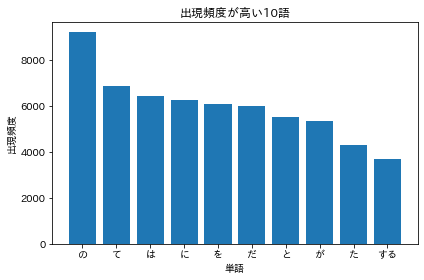

In [39]:
import matplotlib.pyplot as plt
import japanize_matplotlib

words = [word[0] for word in sorted_word_counts[:10]]
counts = [word[1] for word in sorted_word_counts[:10]]

plt.bar(words, counts)
plt.xlabel('単語')
plt.ylabel('出現頻度')
plt.title('出現頻度が高い10語')
plt.tight_layout()  # ラベルが重ならないように自動調整
plt.show()

<h3>37: 「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

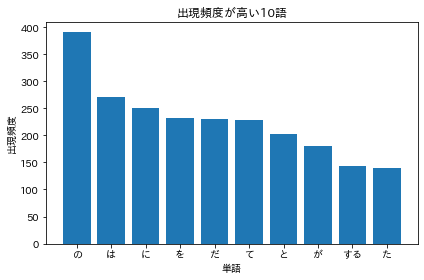

In [40]:
import matplotlib.pyplot as plt
import japanize_matplotlib
from collections import defaultdict

word_counts = defaultdict(int)
for sentence in text_dict:
    if "猫" in [morph["surface"] for morph in sentence]:
        for morph in sentence:
            if morph["pos"] != "記号":
                word_counts[morph["base"]] += 1

del word_counts["猫"]
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

words = [word[0] for word in sorted_word_counts[:10]]
counts = [word[1] for word in sorted_word_counts[:10]]

plt.bar(words, counts)
plt.xlabel('単語')
plt.ylabel('出現頻度')
plt.title('出現頻度が高い10語')
plt.tight_layout()  # ラベルが重ならないように自動調整
plt.show()

<h3>38: 単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

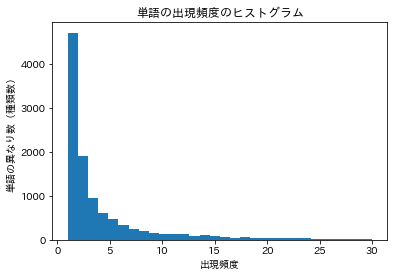

In [74]:
import matplotlib.pyplot as plt
import japanize_matplotlib
from collections import defaultdict

word_counts = defaultdict(int)

for sentence in text_dict:
    for morph in sentence:
        if morph["pos"] != "記号":
            word_counts[morph["base"]] += 1

counts = word_counts.values()
# 最大値だとグラフが見づらいため、1~30に指定。
n = 30
plt.hist(counts, range=(1,n), bins=n)
plt.xlabel('出現頻度')
plt.ylabel('単語の異なり数（種類数）')
plt.title('単語の出現頻度のヒストグラム')
plt.show()

<h3>39: 単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

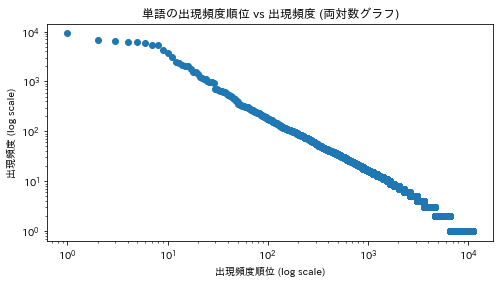

In [95]:
import matplotlib.pyplot as plt
import japanize_matplotlib
from collections import defaultdict

word_counts = defaultdict(int)

for sentence in text_dict:
    for morph in sentence:
        if morph["pos"] != "記号":
            word_counts[morph["base"]] += 1

counts = sorted(list(word_counts.values()), reverse=True)
rank = list(range(1,len(counts) + 1))

plt.figure(figsize=(8, 4))
plt.scatter(rank, counts)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('出現頻度順位 (log scale)')
plt.ylabel('出現頻度 (log scale)')
plt.title('単語の出現頻度順位 vs 出現頻度 (両対数グラフ)')
plt.show()